
<a id='chap-tpsvmlineaires'></a>

# Travaux pratiques : 
# Partie 1 : cas de données spéparables (SVM linéaires)

---



L’objectif de cette séance de travaux pratiques est d’illustrer l’utilisation des machines à vecteurs de support  (*Support Vector Machines*, SVM) pour les problèmes de classification linéaires en python avec Scikit-learn.


## Machines à vecteurs de support linéaires

Les machines à vecteurs de support (SVM : *Support Vector Machines*) sont une classe de méthodes d’apprentissage statistique basées sur le principe de la maximisation de la marge (séparation des classes). Il existe plusieurs formulations (linéaires, versions à noyaux) qui peuvent s’appliquer sur des données séparables (linéairement) mais aussi sur des données non séparables.

Les avantages des SVM :
- Elle tend à maximiser une marge,       
capable de traiter des problèmes de grandes dimensions.               
- La formulation théorique de ce type d'algorithme (borne de l'erreur de généralisation) est :       
    - fonction du nombre d'exemples et est indépendante de la dimension des donnée.               
    - L’astuce du noyau permet de traiter des problèmes de classification  non linéaire.


Désavantages :

- Si le nombre d’attributs est beaucoup plus grand que le nombre d’échantillons, les performances sont moins bonnes.  
- Comme il s’agit de méthodes de discrimination entre les classes, elles ne fournissent pas d’estimations de probabilités d'une façon directe, néanmoins il existe des solutions pour l'estimation de la probabilité d'appartenance d'un élément à une classe.

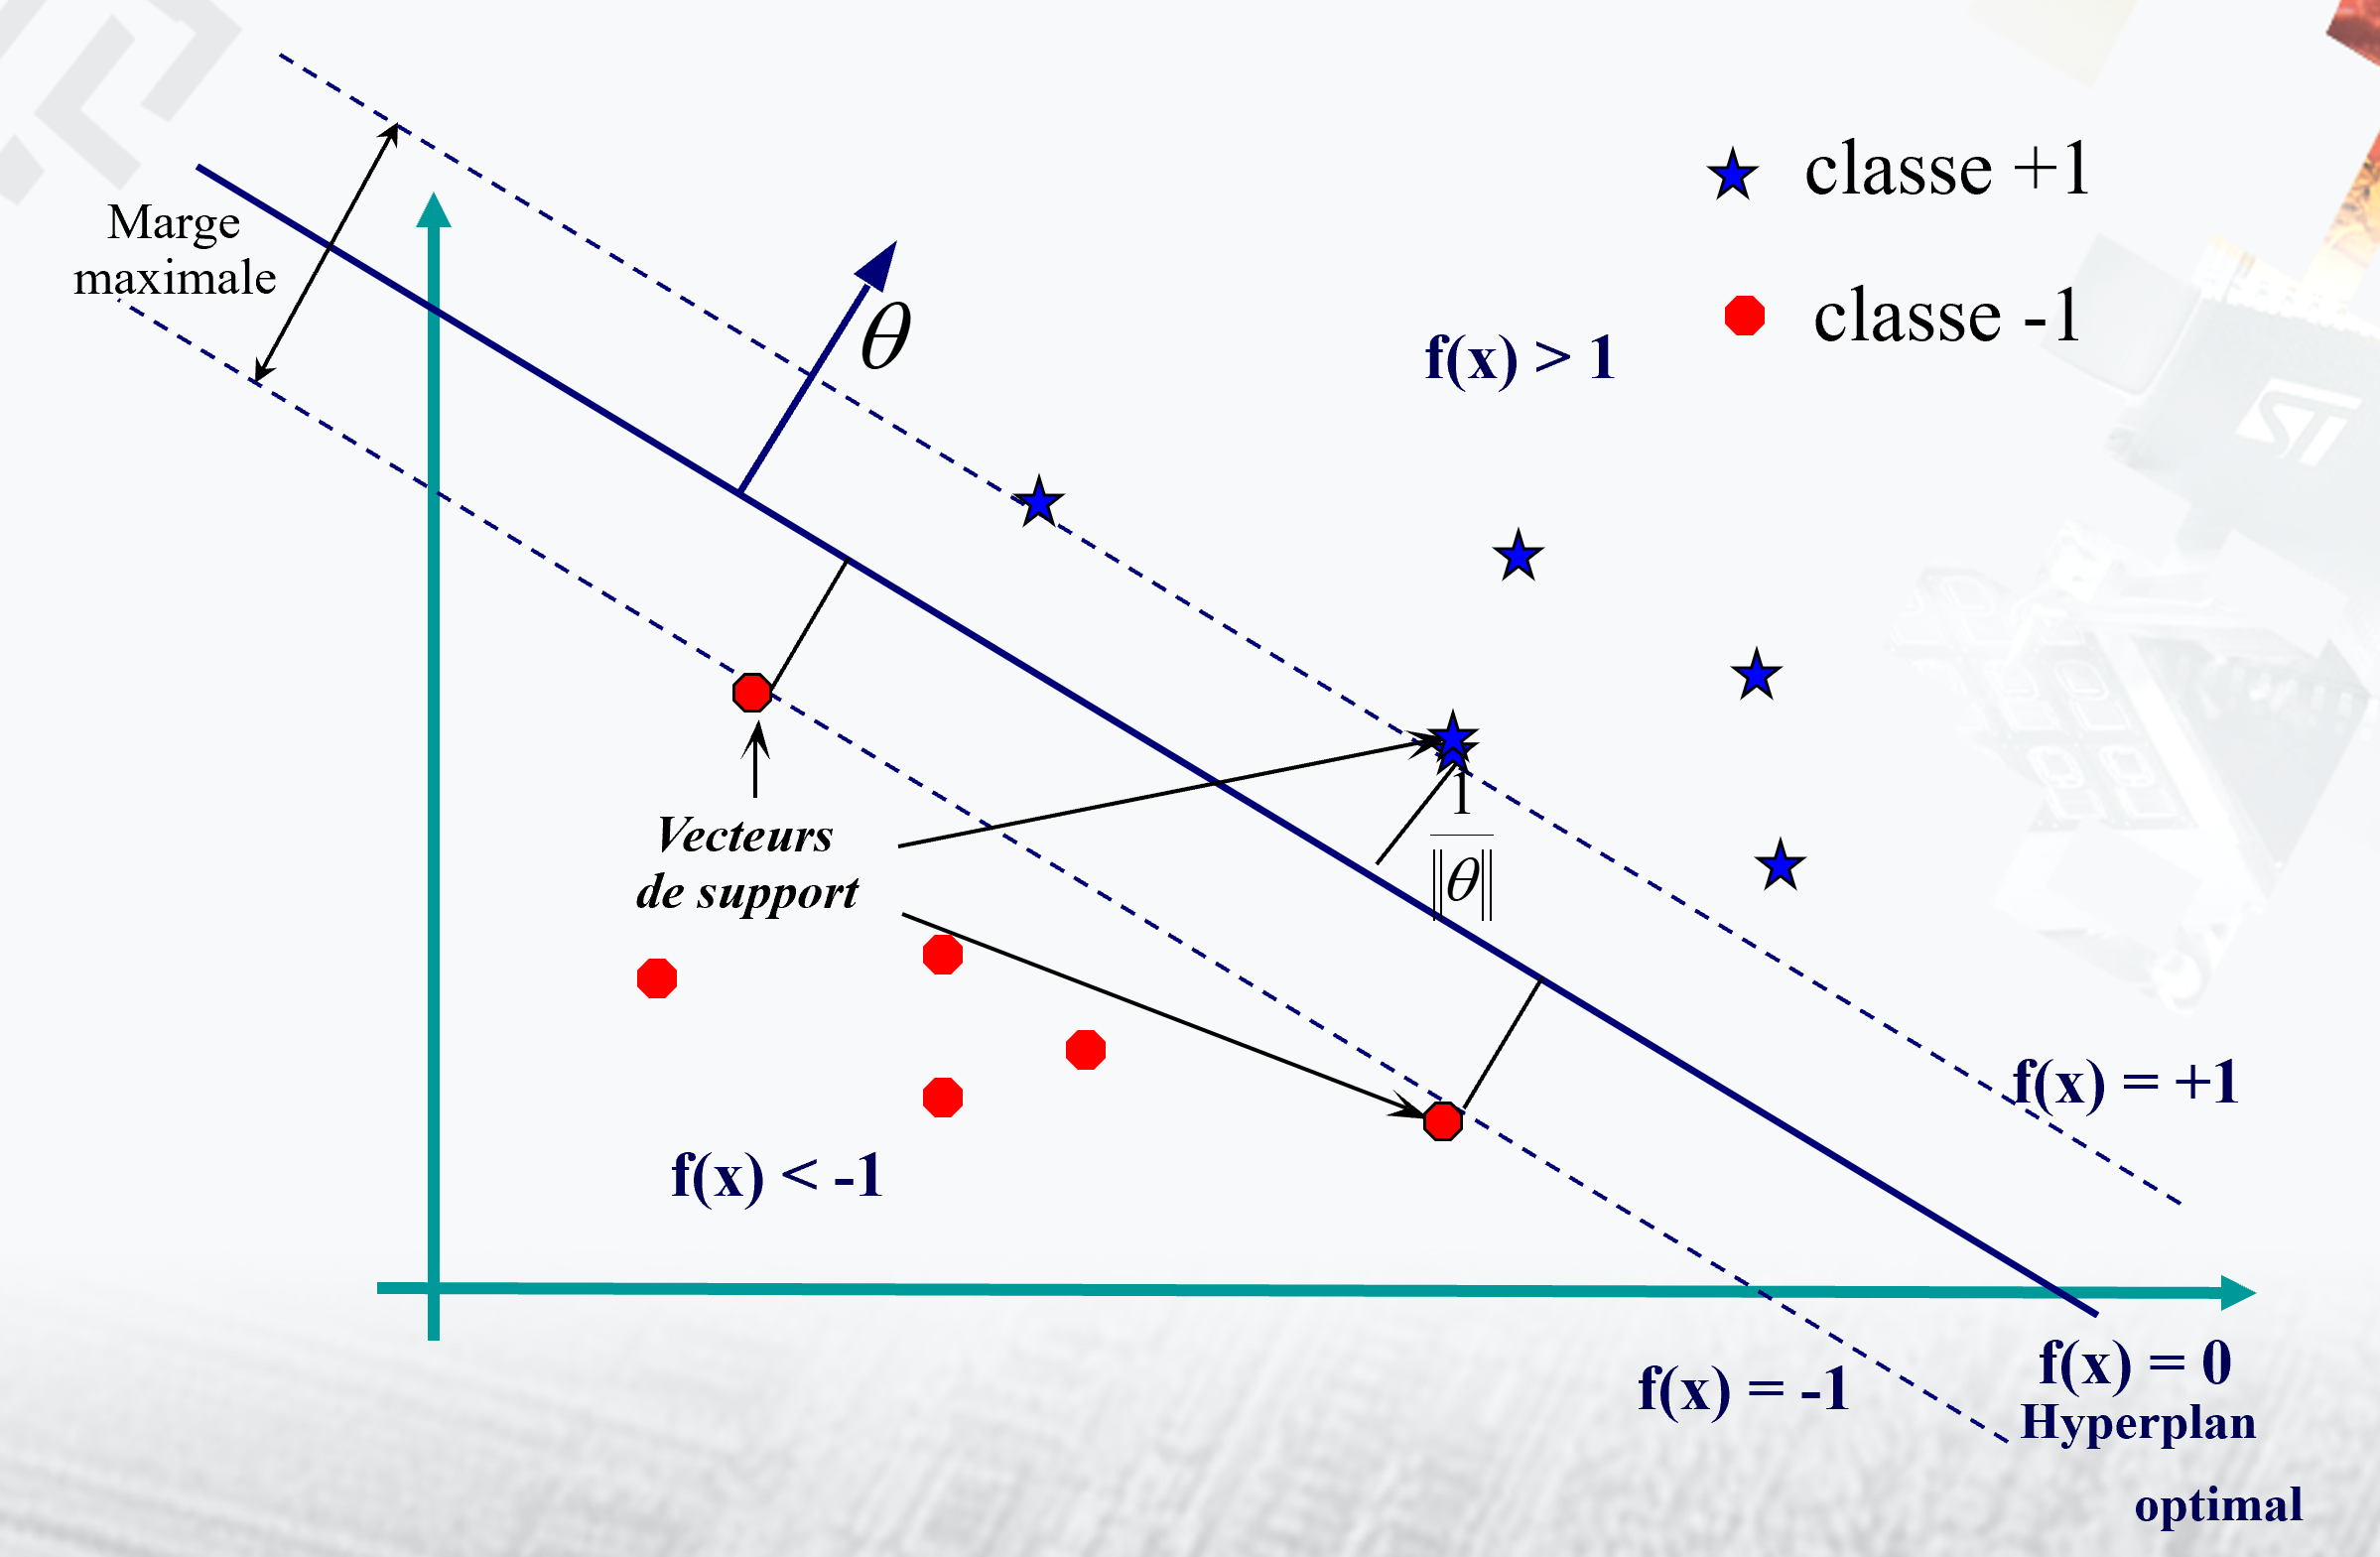

## Jeu de données Iris

Dans Scikit-learn, les SVM sont implémentées dans le module `sklearn.svm`. Dans cette partie nous allons nous intéresser à la version linéaire. Dans ce TP nous allons utiliser le jeu de données Iris. Pour pouvoir afficher les résultats, on va utiliser seulement les premiers deux attributs (longueur et largeur des sépales).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import seaborn as sns

# Chargement des données
iris = datasets.load_iris()

In [2]:
df = sns.load_dataset('iris')
data = iris.data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.columns.array

<PandasArray>
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Length: 5, dtype: object

In [4]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
44,5.1,3.8,1.9,0.4,setosa
62,6.0,2.2,4.0,1.0,versicolor
133,6.3,2.8,5.1,1.5,virginica
107,7.3,2.9,6.3,1.8,virginica
46,5.1,3.8,1.6,0.2,setosa
101,5.8,2.7,5.1,1.9,virginica
61,5.9,3.0,4.2,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
93,5.0,2.3,3.3,1.0,versicolor
120,6.9,3.2,5.7,2.3,virginica


In [5]:
# On vérifie le type de chaque donnée
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
# On détermine s'il y a des données null dans le DataFrame
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Résumé global du dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Statistique sur les données du DataFrame
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


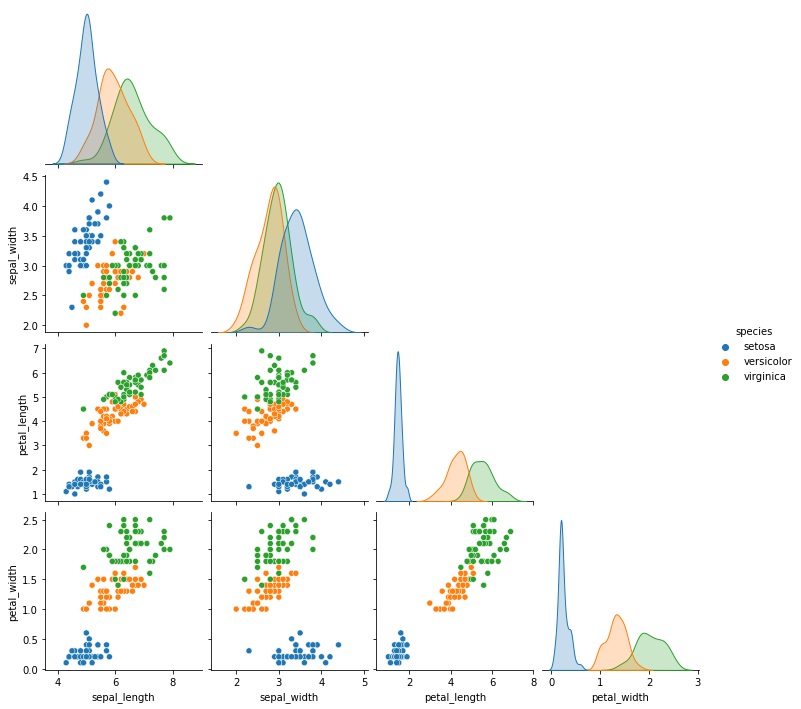

In [9]:
# Visualisation des données sur des graphes à partir des types de plantes
sns.pairplot(data=df, hue='species', corner=True)

data.head()
data.columns.array
data.dtypes
data.isna().sum()
data.info()
data.describe()

seaborn.pairplot : sns.pairplot(data=data, hue='Outcome')



# Pré-analyse des données (EDA) :



Pour commencer, nous ne conservons que les deux premiers attributs du jeu de données :

In [10]:
X, y = iris.data[:, :2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Nous pouvons maintenant entraîner une machine à vecteur de support linéaire :

In [11]:
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

## Question

Calculez le score d’échantillons bien classifiés sur le jeu de données de test.

In [12]:
from sklearn.metrics import f1_score

# On détermine la cohérence du modèle entre les valeurs d'entrainement et les valeurs de tests
result = lin_svc.predict(X_test)
f1_score(result, y_test, average='micro')

0.7333333333333333

Visualisons maintenant la surface de décision apprise par notre modèle :

Text(0.5, 1.0, 'LinearSVC')

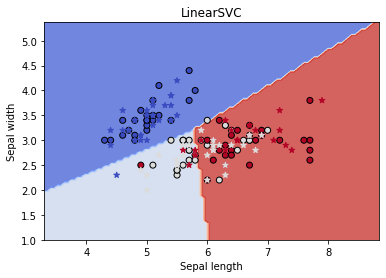

In [13]:
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

## Question :

Testez differentes valeurs pour le paramètre C. Comment la frontière de décision évolue en fonction de C ?

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


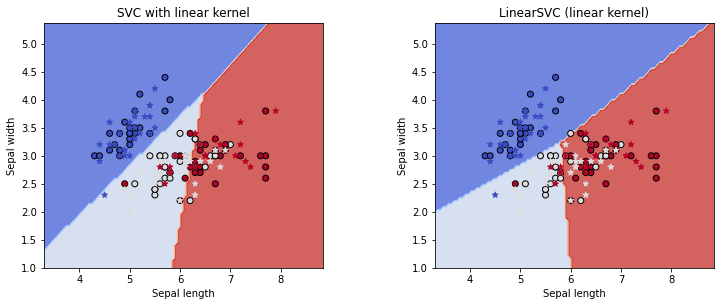

In [14]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

## Question

D’après la visualisation ci-dessus, ce modèle vous paraît-il adapté au problème ? Si non, que peut-on faire pour l’améliorer ?

Nous verrons dans le prochain TP que scikit-learn permet de manipuler des machines à vecteurs de support avec des noyaux non-linéaires dans la classe `SVC`.

Les modèles linéaires `LinearSVC()` et `SVC(kernel='linear')`, comme nous l’avons déjà dit, produisent des résultats légèrement différents à cause du fait qu’ils optimisent des fonctions de coût différentes mais aussi à cause du fait qu’ils gèrent les problèmes multi-classe de manière différente (linearSVC utilise *One-vs-All* et SVC utilise *One-vs-One*).

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


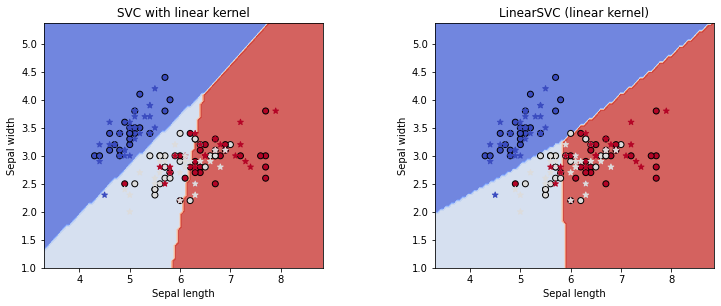

In [15]:
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

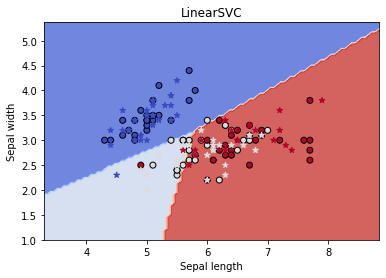

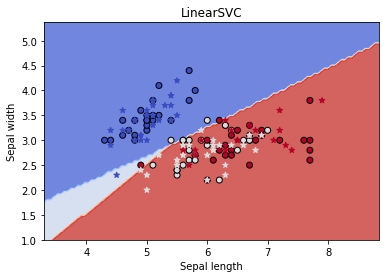

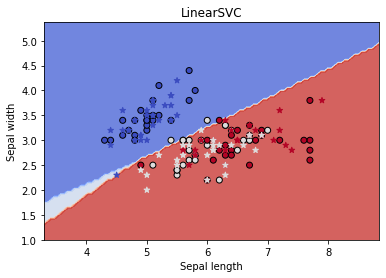

In [16]:
C_list = [0.5, 0.1, 0.05]

for C in C_list:
  lin_svc = svm.LinearSVC(C=C)
  lin_svc.fit(X_train, y_train)

  # Créer la surface de décision discretisée
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
  h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Surface de décision
  Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title("LinearSVC") 
  plt.show()

# Réponse

Avec le changement des valeurs des paramètres on s'aperçoit que la zone blanche se réduit.

Pour l’instant, nous n’avons exploité que deux variables explicatives. Néanmoins, l’intérêt des machines à vecteur de support linéaires est qu’il est souvent plus facile de trouver des hyperplans séparateurs dans des espaces de grande dimension.

## Question

Réalisez l’optimisation d’une nouvelle machine à vecteur de support linéaire mais en utilisant les quatre attributs du jeu de données Iris. Le score de classification en test a-t-il augmenté ? Pourquoi ?

In [17]:
X, y = iris.data[:, :4], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

# On détermine la cohérence du modèle entre les valeurs d'entrainement et les valeurs de tests
result = lin_svc.predict(X_test)
f1_score(result, y_test, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([1.        , 0.98039216, 0.98181818])

# Réponse 

on s'aperçoit que le score augmente bien, cela est sûrement dû au fait qu'on prend moins de données d'entraînement.

# Partie 2 : SVM Non linéaires

---



L’objectif de cette partie est d’illustrer l’utilisation des machines à vecteurs de support  (*Support Vector Machines*, SVM) pour les problèmes de classification non linéaires en python avec Scikit-learn.


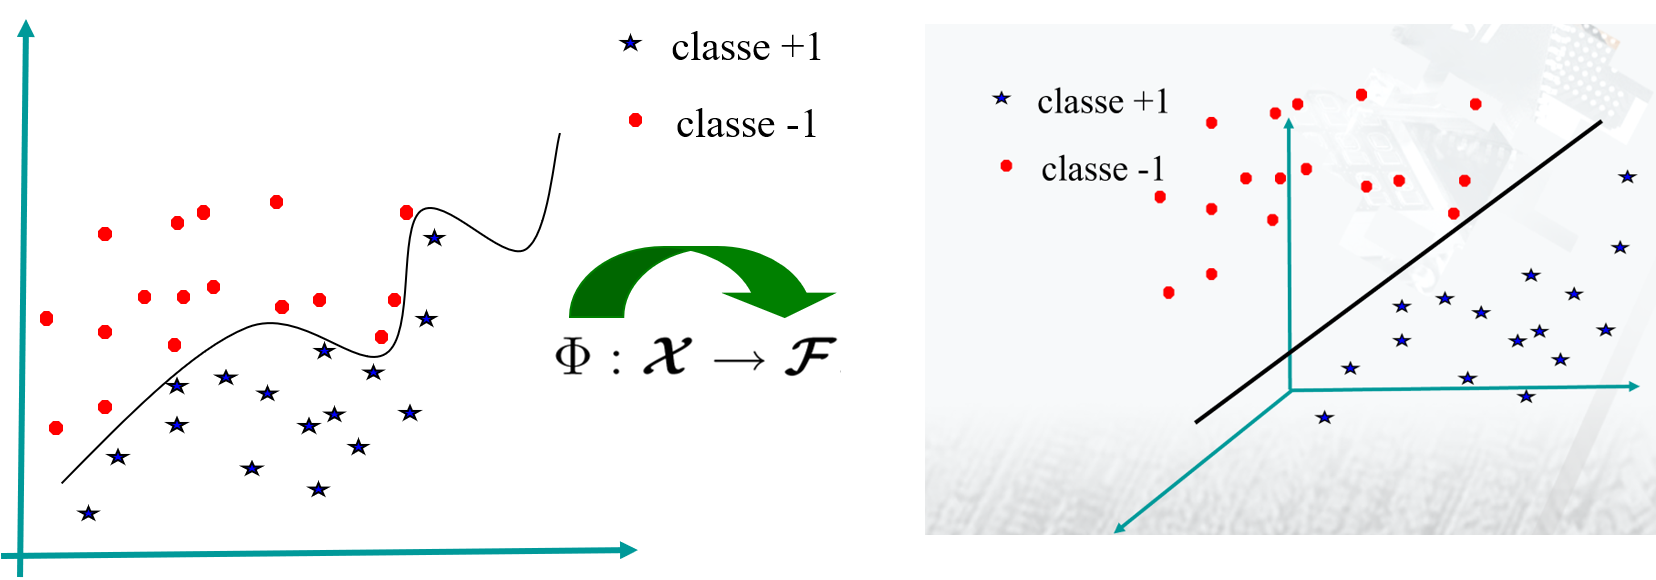

## Question

Refaites la classification de la base de données `iris` mais avec un noyau gaussien. Testez l’effet du paramètre d’échelle du noyau (`gamma`) et du paramètre de régularisation `C`.

In [18]:
# Exercice 2
df = sns.load_dataset('iris')



```
# Ce texte est au format code
```

Comme dans la partie précédente, nous pouvons afficher la frontière de décision en ne conservant que deux variables explicatives :

In [19]:
X, y = iris.data[:,:2], iris.target
# On conserve 50% du jeu de données pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

Text(0.5, 1.0, 'SVM RBF')

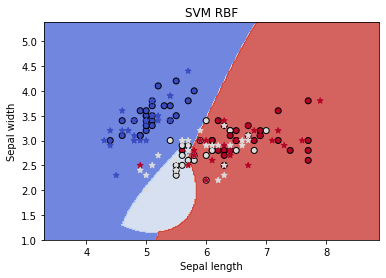

In [20]:
clf = svm.SVC(C=0.1, kernel='rbf', gamma=0.25)
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("SVM RBF")

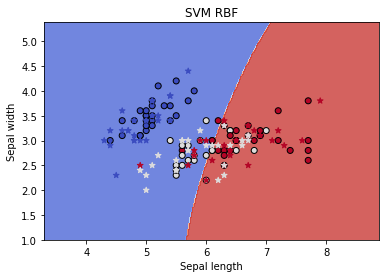

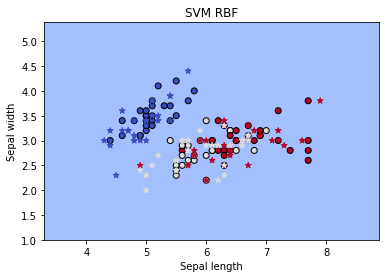

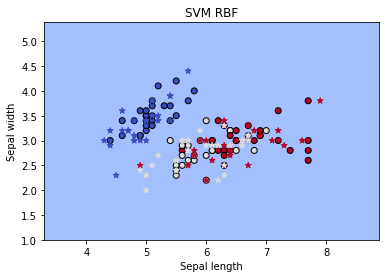

In [21]:
gammas = [0.1, 0.01, 0.001]

for gamma in gammas:
  clf = svm.SVC(C=0.1, kernel='rbf', gamma=gamma)
  clf.fit(X_train, y_train)

  # Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
  h = .02
  # Créer la surface de décision discretisée
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Surface de décision
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  # Afficher aussi les points d'apprentissage
  plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
  plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.title("SVM RBF")
  plt.show()

## Question

Que constatez-vous par rapport à la partie précédente ?

# Réponse

On constate que l'on sépare plus les différentes classes par des lignes mais par des objets sphériques.

Ce type de représentation peut rendre le modèle plus précis et général.

## Jeu de données Digits

Reprenons notre base de données Digits de chiffres manuscrits.

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(1797, 64)
(1797,)


In [23]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [24]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

## Question

Réalisez une classification par une SVM linéaire et une SVM à noyau gaussien du jeu de données Digits.
Comment est choisi le paramètre `gamma` dans scikit-learn ? Testez différentes valeurs de ce paramètre pour évaluer son influence. En particulier, testez les paramètres `gamma='auto'` et `gamma='scale'`. À quoi correspondent-ils ?

In [25]:
# Linear
C = 1.0 # paramètre de régularisation
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

# On détermine la cohérence du modèle entre les valeurs d'entrainement et les valeurs de tests
result = lin_svc.predict(X_test)
f1_score(result, y_test, average=None)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([1.        , 0.90909091, 0.98630137, 0.94736842, 0.95522388,
       0.98876404, 0.96153846, 1.        , 0.92105263, 0.98412698])

In [26]:
# Kernel
clf = svm.SVC(C=0.1, kernel='rbf', gamma=.2)
clf.fit(X_train, y_train)
result = clf.predict(X_test)
f1_score(result, y_test, average='micro')

0.06944444444444445

## Question :

Réalisez une analyse en composante principale (ACP) et gardez les 2 premières composantes principales (voir la [documentation Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Ensuite faites une classification avec un noyau gaussien et affichez les points de test ainsi que la surface de décision (reprendre le code du TP SVM linéaire). Comparez avec une SVM linéaire.

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)
y = digits.target[:100]
X = X[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(100, 2)

Text(0.5, 1.0, 'SVM RBF')

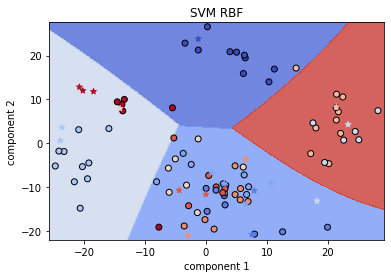

In [33]:
clf = svm.SVC(C=1, kernel='rbf', gamma='scale')
clf.fit(X_train, y_train)

# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = .02
# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title("SVM RBF")

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


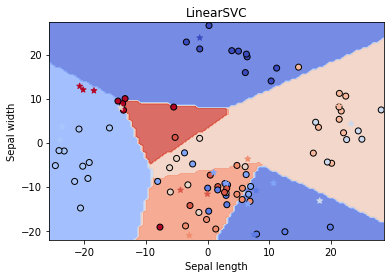

In [34]:
lin_svc = svm.LinearSVC(C=C)
lin_svc.fit(X_train, y_train)

# Créer la surface de décision discretisée
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Pour afficher la surface de décision on va discrétiser l'espace avec un pas h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Surface de décision
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Afficher aussi les points d'apprentissage
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC") 
plt.show()

## Question

Réalisez une recherche par grille afin de déterminer sur le jeu de données Digits complet (sans l’ACP) :

- le meilleur noyau à utiliser,  
- la meilleure valeure de `C`,  
- la meilleure valeur de `gamma` (ou le degré du polynome pour un noyau polynomial).  
- (optionnel) la meilleure valeur de `n_components` de l’ACP  

In [35]:
from sklearn.model_selection import GridSearchCV

svc = svm.SVC()
param_grid = {'kernel': ['linear', 'rbf']}

grid = GridSearchCV(svc, param_grid = param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'kernel': 'rbf'}


In [36]:
svc = svm.SVC()
param_grid = {'C': [1, 10, 100, 1000]}

grid = GridSearchCV(svc, param_grid = param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 1}


In [37]:
svc = svm.SVC()
param_grid = {'gamma': [0.01, 0.001, 0.0001]}

grid = GridSearchCV(svc, param_grid = param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'gamma': 0.01}


# Réponse

On peut clairement voir les paramètres qui sont optimales par rapport aux autres hyper-paramètres.

## Question

(optionnel) Combien de composantes faut-il garder au minimum dans l’ACP pour classer correctement au moins 97% des images ? À quel facteur de réduction de dimension cela correspond-il ?

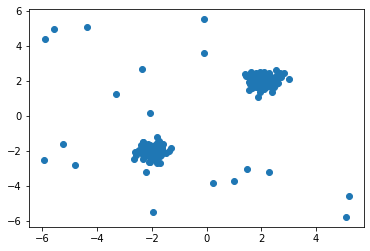

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm

# On créé deux groupes séparés (échantillons de gaussiennes)
N = 200
data1 = 0.3 * np.random.randn(N // 2, 2) + [2,2]
data2 = 0.3 * np.random.randn(N // 2, 2) - [2,2]

# On créé 10% de données anormales (*outliers*)
outliers = np.random.uniform(size=(N // 10, 2), low=-6, high=6)

# Les données = groupes + anomalies
X = np.concatenate((data1, data2, outliers))

plt.scatter(X[:,0], X[:,1]) and plt.show()

Nous pouvons ensuite créer le modèle de one-class SVM avec sklearn. Le paramètre nu correspond à la proportion maximale d’erreurs autorisées, c’est-à-dire au pourcentage maximal de points du jeu de données que l’on acceptera d’exclure de notre classe. Cette fraction doit peu ou prou correspondre au pourcentage de données anormales attendu dans le jeu de données. Dans notre cas, nous savons qu’il y a environ 10% d”outliers donc nous pouvons choisir nu=0.1.

In [39]:
# Construction du modèle (noyau RBF)
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.5)
clf.fit(X)

OneClassSVM(gamma=0.5, nu=0.1)

Le code suivant permet alors de tracer les frontières (plus exactement les lignes de niveaux) de la fonction de décision de la OneClassSVM ainsi entraînée :

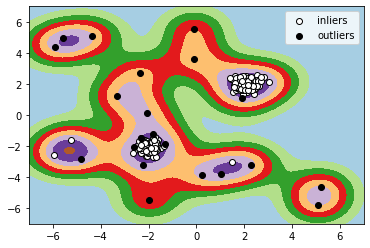

In [40]:
# Afficher les points et les vecteurs les plus proches du plan de séparation
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
y_pred = clf.predict(X)

# Choix du jeu de couleurs
plt.set_cmap(plt.cm.Paired)
# Trace le contour de la fonction de décision
plt.contourf(xx, yy, Z)
# Affiche les points considérés comme "inliers"
plt.scatter(X[y_pred>0,0], X[y_pred>0,1], c='white', edgecolors='k', label='inliers')
# Affiche les points considérés comme "outliers"
plt.scatter(X[y_pred<=0,0], X[y_pred<=0,1], c='black', label='outliers')
plt.legend()
plt.show()



Question

Testez plusieurs valeurs pour le paramètre gamma. Pour quelle valeur le résultat semble meilleur (moins de outliers incorrectement classés) ? En pratique on ne connait pas les outliers, l’utilité des OCSVM est de les détecter. Le paramètre nu doit aussi avoir une bonne valeur pour ne pas sous-estimer (ou sur-estimer) le support de la distribution.


Réponse :

Visuellement, une valeur de gamma entre 1e-4 et 5e-2 semble acceptable : les centres des gaussiennes sont identifiées comme inliers tandis que les points plus éloignés sont marqués comme aberrants (outliers), ce qui correspond à la façon dont on a généré les données.

## SVM pour la régression

Dans le cas de la régression, l’objectif est d’apprendre un modèle qui prédit les valeurs d’une fonction à partir des valeurs des variables d’entrée. L’idée est de trouver la fonction la plus « lisse » qui passe par les (ou à proximité des) données d’apprentissage. Scikit-learn implémente le modèle SVR (epsilon-regression) dans le module Python `sklearn.svm.SVR` dont vous pouvez bien sûr consulter [la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

Dans cette partie nous présenterons la régression dans le cas unidimensionnel en comparant plusieurs noyaux avec scikit-learn. Le module `sklearn.svm.SVR` permet de faire varier tous les paramètres.

Il faut d’abord importer les modules :

## SVM pour la régression

Dans le cas de la régression, l’objectif est d’apprendre un modèle qui prédit les valeurs d’une fonction à partir des valeurs des variables d’entrée. L’idée est de trouver la fonction la plus « lisse » qui passe par les (ou à proximité des) données d’apprentissage. Scikit-learn implémente le modèle SVR (epsilon-regression) dans le module Python `sklearn.svm.SVR` dont vous pouvez bien sûr consulter [la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

Dans cette partie nous présenterons la régression dans le cas unidimensionnel en comparant plusieurs noyaux avec scikit-learn. Le module `sklearn.svm.SVR` permet de faire varier tous les paramètres.

Il faut d’abord importer les modules :

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR

### Données synthétiques

Dans un premier temps, nous allons travailler sur des données générées. Notre objectif sera de reproduire une sinusoïde, comme dans le TP sur les arbres de décision :

In [42]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

On ajoute un bruit aléatoire sur 20% des observations. Nos échantillons d’entraînement correspondent donc à la courbe suivante :

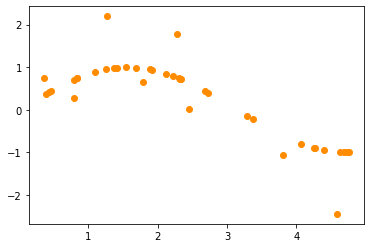

In [43]:
y[::5] += 3 * (0.5 - np.random.rand(8))
plt.scatter(X, y, color='darkorange', label='Données')

Nous pouvons facilement entraîner trois modèles de SVM pour la régression grâce à la classe `SVR` de scikit-learn :

In [44]:
# Création des SVM
C = 1e3
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_lin = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)

# Entraînement des SVM sur les observations bruitées
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

Afficher les résultats :

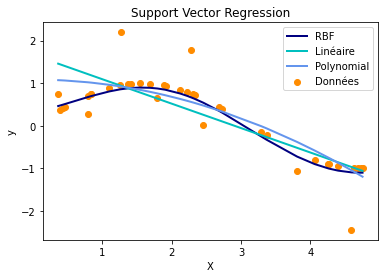

In [45]:
plt.scatter(X, y, color='darkorange', label='Données')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF')
plt.plot(X, y_lin, color='c', lw=2, label='Linéaire')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Question :

Pourquoi employer une valeur aussi grande pour le parametre `C` (ici, `C = 1000`) ?

La constante C>0 permet de choisir le point d’équilibre entre l’aplatissement de la solution et l’acceptation d’erreurs au-delà de ϵ-SVM pour la régression. Une valeur trop petite de C nous donne un estimateur trop lisse (sous apprentissage). Pour une valeur trop grande, la fonction estimée prend trop en compte le bruit (sur-apprentissage).